In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Read file dataframe:

In [2]:
lol_df = pd.read_csv("lol_df.csv")

#### __Top 20 champions with most voices:__

In [3]:
voices_df = lol_df.filter(items=["champion","voice_line","is_spoken"])
voices = voices_df.groupby("champion")["voice_line"].count()

names_x = np.array(voices.sort_values(ascending=False).head(20).keys())
values_y = np.array(voices.sort_values(ascending=False).head(20))

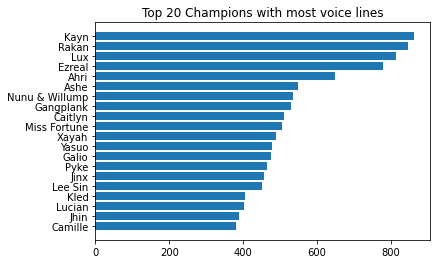

In [4]:
plt.barh(names_x, values_y, si)
plt.title('Top 20 Champions with most voice lines')
ax = plt.gca()
ax.invert_yaxis()
plt.show()

#### __Top 20 most mentioned champions by other champions:__

In [5]:
champ_list = np.array(voices.keys())
filtered_champs = champ_list

In [6]:
filter_champs = {
    'Aurelion Sol':'Aurelion',
    'Dr. Mundo':'Mundo',
    'Jarvan IV':'Jarvan',
    'Kayn':'Rhaast',
    "Kog'Maw":"Kog",
    'Nunu & Willump':'Nunu',
    'Renata Glasc':'Renata',
    'Tahm Kench':'Tahm',
    'Twisted Fate':'Twisted',
    'Xin Zhao':'Xin',
}

In [7]:
filtered_champs = list(map(filter_champs.get, filtered_champs, filtered_champs))

stat_voices = []
for champ in filtered_champs:
    voice_count = voices_df[voices_df["voice_line"].str.contains(champ, na = False)] # Filtra falas que contém o champion
    voice_count = voice_count.loc[(voice_count["is_spoken"] == True) & (voice_count["champion"] != champ) & (~voice_count["champion"].str.contains(champ))]["voice_line"].count() # Separa somente as vozes
    stat_voices.append([champ,voice_count])

In [8]:
table_voices = pd.DataFrame(stat_voices, columns=["champion", "count_voices"]).sort_values("count_voices", ignore_index=True, ascending=False).head(20)
x = np.array(table_voices["champion"])
y = np.array(table_voices["count_voices"])

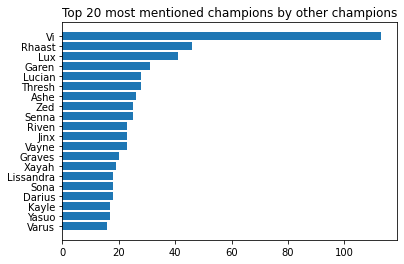

In [9]:
plt.barh(x, y)
plt.title('Top 20 most mentioned champions by other champions')
ax = plt.gca()
ax.invert_yaxis()
plt.show()